**Discovering the Relationship between Ethnic/Racial Diversity and Music Genre Diversity of a Country**

James McGhee, Neha Shijo, Varunika Tewani

**Introduction**
Is there a relationship between the racial/ethnic diversity of a country and the diversity of the music its citizens listen to? Our project attempts to determine what genres of music are most popular in 34 countries around the world, and whether countries which have more diverse populations also have greater quantity and diversity of musical genre. 

**Data Collection**
In order to answer this question, we used the following Kaggle dataset. It contains all of the songs from Spotify's Daily Top 200 charts in 35 countries from 2017 to 2020. The dataset contains 170633 rows and 151 fields, including Title, Artist, Album, Genre, and Country. 

Link: https://www.kaggle.com/pepepython/spotify-huge-database-daily-charts-over-3-years?select=Final+database.csv


First, we import the necessary packages and read in our dataset, which is located in a CSV file. 

In [107]:
# Used to create treemap of song genres
!pip install squarify 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify 

df = pd.read_csv('Final database.csv')
df

C:\Users\nehas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Since 151 columns can be cumbersome to read, let's keep only the necessary columns for a visually cleaner table.

In [ ]:
df = df[['Country', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Album']]
df

Next, let's run some basic preliminary statistics on the dataset. Out of 170633 songs we have 47045 unique songs, 25524 unique artists, 34696 unique albums, 1120 unique genres and 34 unique countries. 

In [110]:
print(len(pd.unique(df['Title'])))

print(len(pd.unique(df['Artist'])))

print(len(pd.unique(df['Album'])))

print(len(pd.unique(df['Genre'])))

print(len(pd.unique(df['Country'])))

print(pd.unique(df['Country']))

47045
25524
34696
1120
35
['Global' 'USA' 'Argentina' 'Belgium' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Germany' 'Ecuador' 'Spain' 'Italy' 'Mexico' 'Peru'
 'Portugal' 'Taiwan' 'UK' 'Austria' 'Australia' 'Canada' 'Finland'
 'France' 'Indonesia' 'Ireland' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Philippines' 'Poland' 'Sweden' 'Singapore' 'Turkey'
 'Brazil' 'Denmark']


Next, let's try making some graphs on measures of the data.

First, a bar chart of the distribution of songs among countries. We'll make an auxiliary dataframe to store the number of songs per country, and plot it in decreasing order. After plotting, it looks like the countries which have the most "Spotify's Daily Top 200" songs in the data set are Switzerland, Taiwan, Sweden, Germany and Finland, with 7686, 7594, 6970, 6942 and 6783 songs each. In contrast, Ecuador, Peru, Philippines, Mexico, and Costa Rice are least represented, with 2660, 2701, 2806, 2833, and 2975 songs each. 

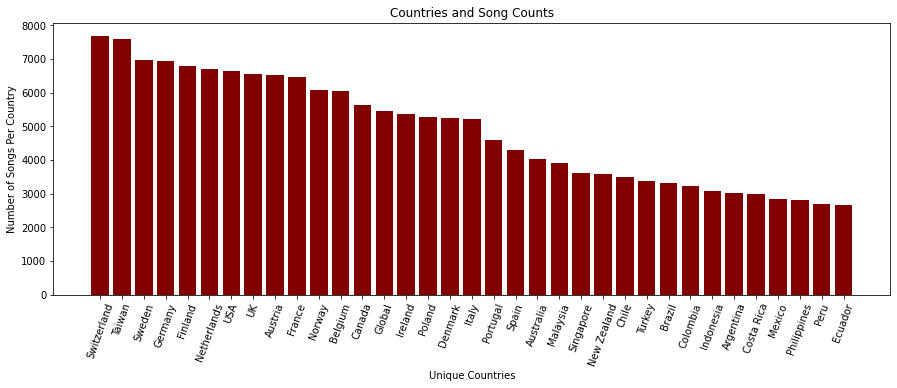

In [111]:
song_count = df.groupby(['Country']).size()

countries = pd.DataFrame({'Country':song_count.index, 'Song Count':song_count.values})

countries = countries.sort_values(by=['Song Count'], ascending=False)

plt.figure(figsize=(15,5))
plt.bar(countries['Country'], countries['Song Count'], color ='maroon', linewidth='0.9')
 
plt.xlabel("Unique Countries")
plt.ylabel("Number of Songs Per Country")
plt.title("Countries and Song Counts")
plt.xticks(rotation = 70)
plt.show()

Now we'll make a treemap to show the distibution of songs among genres. In order to do this, we group the data set by genre in order to link each genre with a number of songs. We then drop the genre 'n-a', which is a null value, and sort by the number of songs in each genre. Lastly, we use Squarify to plot the visual. As we can see, the most popular genres are dance pop, latin, pop, k-pop, and german hip hop, with 25351, 7591, 7146, 4053, and 3834 songs in each genre. 

In [112]:
genre_count = df.groupby(['Genre']).size()

genre = pd.DataFrame({'Genre':genre_count.index, 'Count':genre_count.values})

genre = genre[genre.Genre != 'n-a']

genre = genre.sort_values(by=['Count'], ascending=False)

plt.figure(figsize=(150,150)) 

squarify.plot(sizes=genre['Count'], label=genre['Genre'][:50], alpha=.8,text_kwargs={'fontsize':80, 'wrap':True} )
plt.axis('off')
plt.show()

Now that we know what the most popular genres of music are, let's see how the number of songs per genre is distributed. From describing the dataset and creating a boxplot, it looks like the mean is 148.955317, the standard deviation is 902.533572, and the range varies from 1 as a minimum and 25351 as a maximum number of songs. 

              Count
count   1119.000000
mean     148.955317
std      902.533572
min        1.000000
25%        2.000000
50%        9.000000
75%       51.000000
max    25351.000000


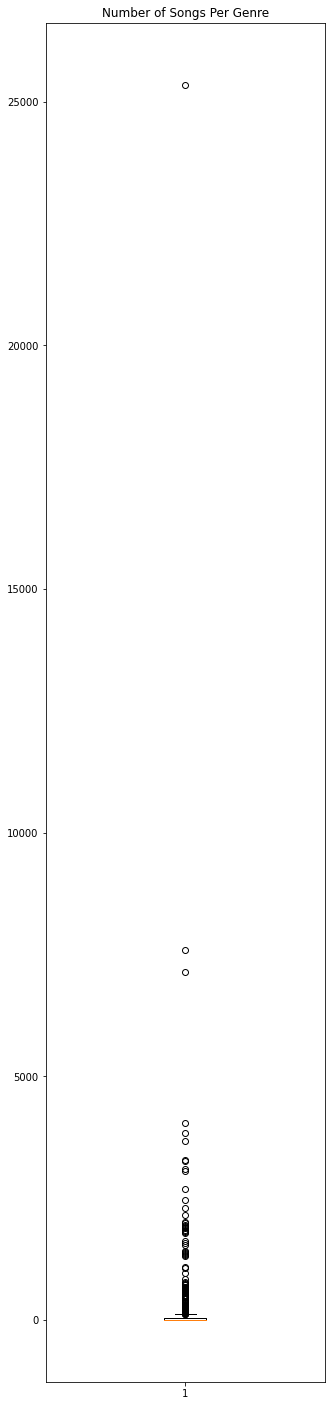

In [113]:
print(genre.describe())

plt.figure(figsize=(5,25)) 
plt.boxplot(genre['Count'])

plt.title("Number of Songs Per Genre")

plt.show()

Let's move into analysis of the Artists appearing in this dataset. First, what is the distribution of followers per artist? Note that this dataset defines "Artist_followers" as the number of followers the artist had on Spotify on the 5th of November 2020. From the description and boxplot, we can see the mean is ~1755574 followers. The standard deviation is ~5412057, and the range varies from a minimum of 0 to a maximum of ~71783101 followers per artist. What are the most popular artists that have the greatest number of followers? Ed Sheeran, with 71783101 followers, Ariana Grande with 52571724 followers, Drake with 50593376 followers, Rihanna with 39741508 followers, and Justin Bieber with 39214943 followers. 

count       25506.000000
mean      1755574.172469
std       5412057.862621
min             0.000000
25%         24017.000000
50%        177318.000000
75%       1037761.000000
max      71783101.000000
Name: Artist_followers, dtype: object


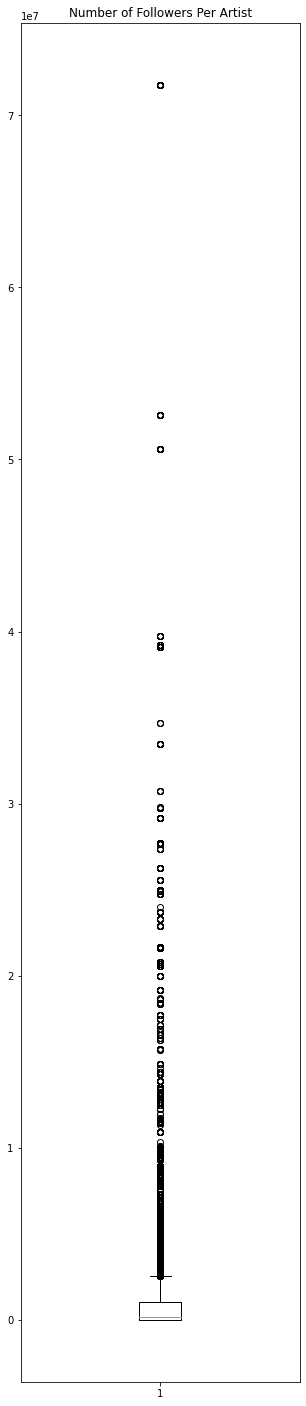

In [122]:
unique_artists = df.drop_duplicates(subset=['Artist'])

unique_artists = unique_artists.dropna(subset=['Artist_followers'])
unique_artists = unique_artists[unique_artists.Artist_followers != 'n-a']

unique_artists['Artist_followers'] = unique_artists['Artist_followers'].astype(float)

unique_artists = unique_artists.sort_values(by=['Artist_followers'], ascending=False)

print(unique_artists['Artist_followers'].describe().apply(lambda x: format(x, 'f')))

plt.figure(figsize=(5,25)) 
plt.boxplot(unique_artists['Artist_followers'])

plt.title("Number of Followers Per Artist")

plt.show()